<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/blob/main/customer_segmentation_Top_Down.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
#!pip install pandas

In [111]:
#!pip install scikit-learn

In [112]:
#!pip install matplotlib

In [113]:
#!pip install seaborn

In [114]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [115]:
#The dataset
df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/main/Dataset/data.csv')  # from my github repository


# EDA

In [116]:
# Display the first few rows of the dataset
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


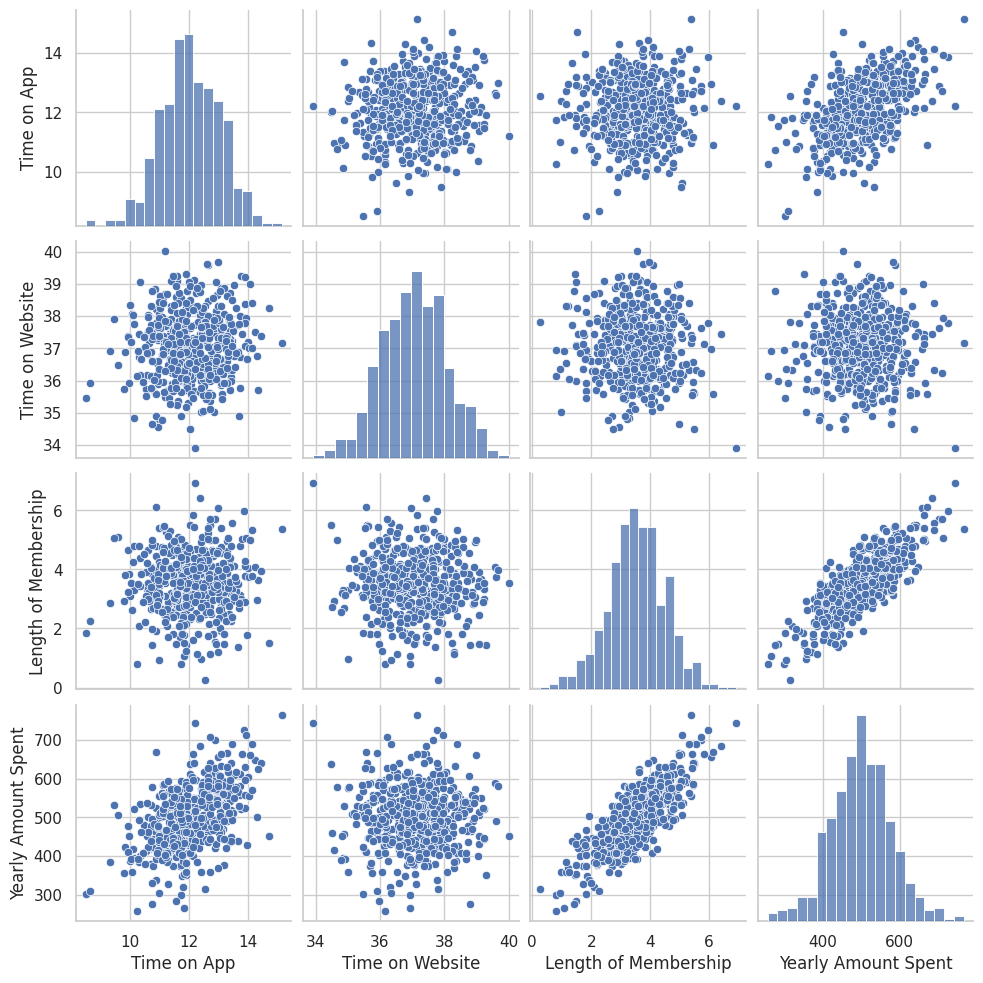

In [117]:
#Exploration and Visualization
sns.pairplot(df)
plt.show()

In [118]:
# Feature selection (for simplicity, excluding non-numeric columns)
X = df[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

# Clustering

Clustering is a process of grouping similar objects together; i.e., to partition unlabeled examples into disjoint subsets of clusters, such that:

*   Examples within a cluster are similar (in this case, we speak of high intraclass similarity).
*   Examples in different clusters are different (in this case, we speak of low interclass similarity).

Two kinds of inputs can be used for grouping:

1.  in similarity-based clustering, the input to the algorithm is an n × n dissimilarity matrix or distance matrix;
2.   in feature-based clustering, the input to the algorithm is an n × D feature matrix or design matrix, where n is the number of examples in the dataset and D the dimensionality of each sample.

Similarity-based clustering allows easy inclusion of domain-specific similarity, while feature-based clustering has the advantage that it is applicable to potentially noisy data.

# Types of Clustering Techniques

1.   Partitional algorithms

  These start with a random partition and refine it iteratively. Also known as “flat” clustering.
> For example, K-means clustering


2.   Hierarchical algorithms

 These organize the data into hierarchical structures, where data can be agglomerated in the bottom-up direction, or split in a top-down manner.

> For example, agglomerative clustering


---

# **Hierarchical Clustering**
Hierarchical clustering is a method of grouping similar data points into clusters. There are two main types:


1.   **Top-down divisive clustering algorithm:** This approach starts with all data points in one cluster and then divides it into smaller clusters.
2.   **Bottom-up agglomerative clustering algorithm:** This approach starts with each data point as a single cluster and merges the closest clusters until only one cluster remains.



# Top-down divisive clustering algorithm

Top-down divisive clustering is a hierarchical clustering algorithm that starts with all data points in one cluster and then recursively divides the clusters into smaller subclusters. Here's a simplified explanation of the top-down divisive clustering algorithm:

1.   **Start with One Cluster:** Begin with all data points belonging to a single cluster.
2.   **Measure Cluster Dissimilarity:** Compute the dissimilarity (distance) between the data points within the cluster. Various distance metrics can be used, such as Euclidean distance or other similarity measures.
3.   **Select a Splitting Point:** Identify the point or feature that maximizes the dissimilarity within the cluster. This point will be used to split the cluster into two subclusters.
4.   **Split the Cluster:** Divide the cluster into two subclusters based on the chosen splitting point. The splitting point essentially becomes a boundary that separates the data points.
5.   **Recursive Process:** Repeat the process for each of the newly formed subclusters. Measure dissimilarity, identify a splitting point, and split the cluster.
6.   **Stop Criterion:** Continue the recursive splitting until a stopping criterion is met. This criterion could be a certain number of clusters reached, a specific level of dissimilarity, or any other condition deemed appropriate for the particular application.
7. **Result:** The final result is a hierarchical tree or dendrogram that represents the top-down division of the original cluster into smaller and more specialized subclusters.

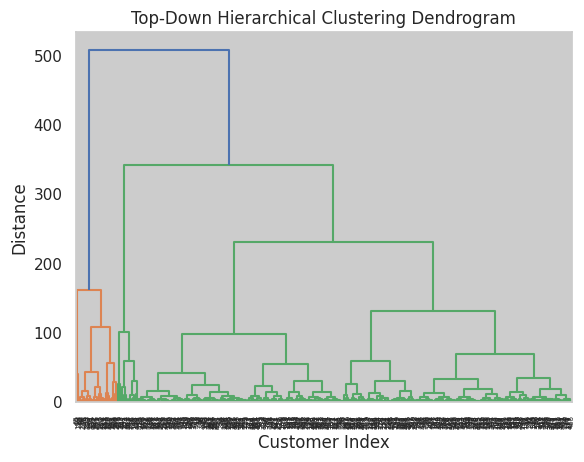

In [119]:
# Perform Hierarchical Clustering (Top-Down)
linkage_matrix = linkage(X, method='complete')  # Use 'complete' for top-down
dendrogram(linkage_matrix)
plt.title('Top-Down Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# **Visual Representation (Dendrogram):**
The result of top-down divisive clustering is often represented as a dendrogram. A dendrogram is a tree-like diagram that illustrates the hierarchical structure of the clusters. The vertical lines in the dendrogram represent the clusters, and their height at the point of merging represents the dissimilarity at that step.

In [120]:
# Choose the desired number of clusters and perform clustering
n_clusters_top_down = 5  # Adjust as needed
top_down_cluster = AgglomerativeClustering(n_clusters=n_clusters_top_down, linkage='complete')
df['Top_Down_Cluster'] = top_down_cluster.fit_predict(X)

In [121]:
# Create a mapping of cluster numbers to new names
cluster_names_top_down = {
    0: 'High-Spending, Engaged',
    1: 'Low-Spending, Moderate Engagement',
    2: 'Highest-Spending, Highly Engaged',
    3: 'Moderate-Spending, Moderate Engagement',
    4: 'Moderate-High Spending, Moderate Engagement'
}

In [122]:
df['Top_Down_Cluster'] = df['Top_Down_Cluster'].map(cluster_names_top_down)

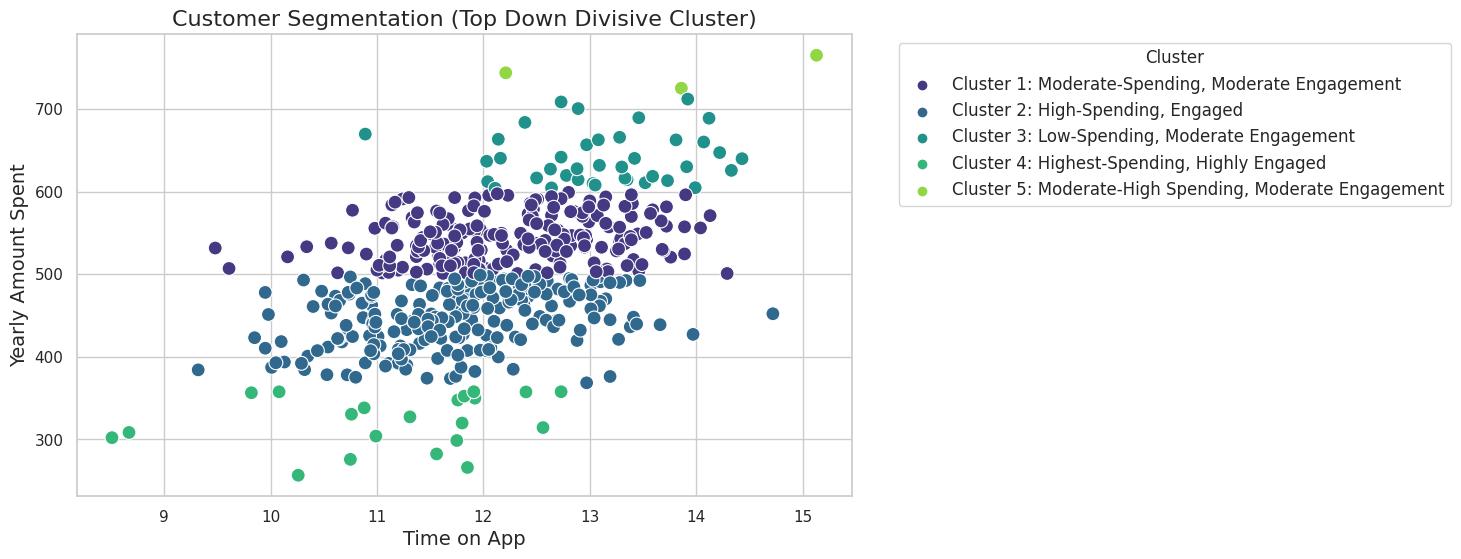

In [123]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Time on App', y='Yearly Amount Spent', hue='Top_Down_Cluster', data=df, palette='viridis', s=100)

# Set plot title and labels
plt.title('Customer Segmentation (Top Down Divisive Cluster)', fontsize=16)
plt.xlabel('Time on App', fontsize=14)
plt.ylabel('Yearly Amount Spent', fontsize=14)

# Move the legend outside the plot to avoid covering data points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster', fontsize=12)

# Customize the legend labels dynamically based on unique cluster names
legend_labels = [f'Cluster {i+1}: {label}' for i, label in enumerate(df['Top_Down_Cluster'].unique())]
scatter.legend_.set_title('Cluster')
for i, text in enumerate(scatter.legend_.texts):
    text.set_text(legend_labels[i])

# Show the plot
plt.show()

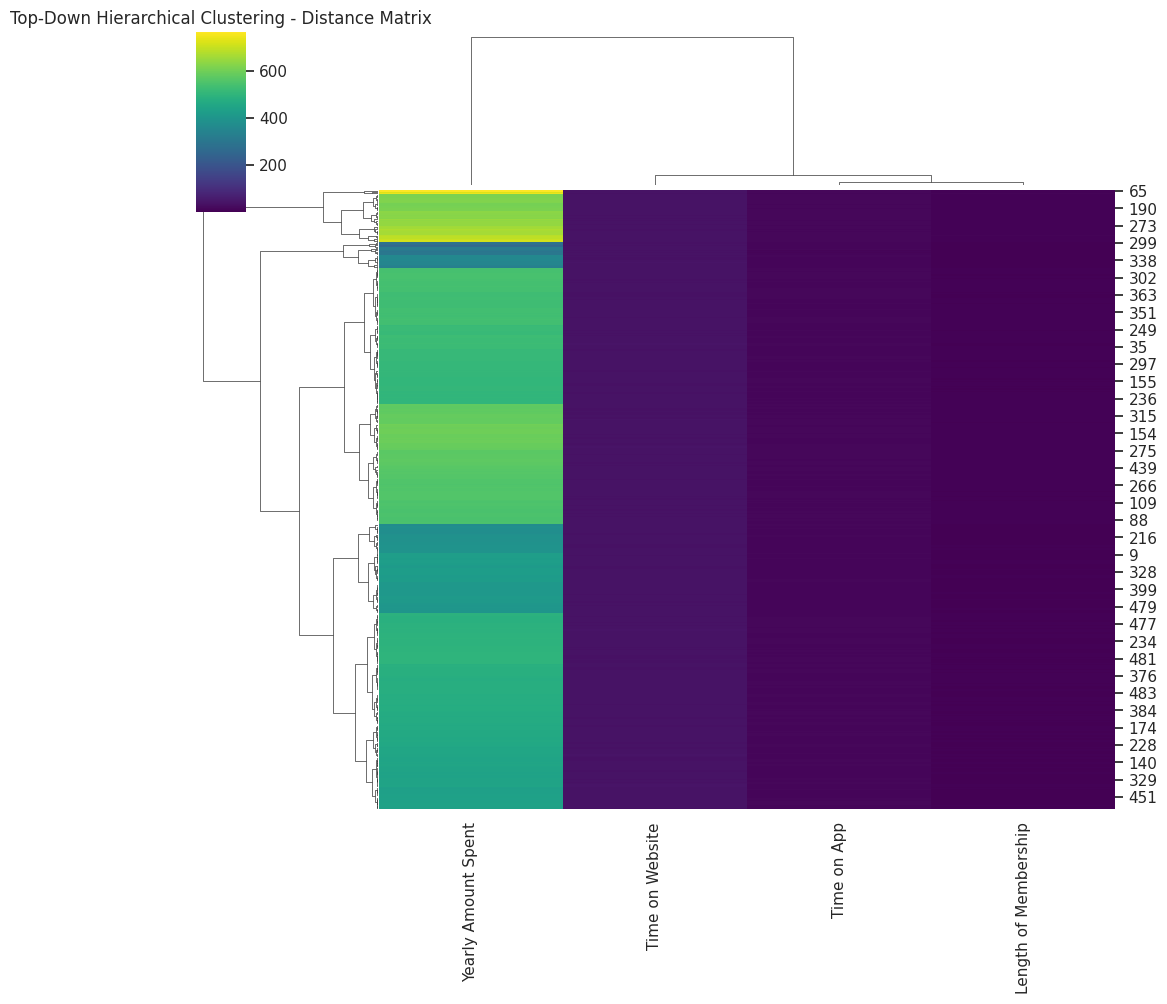

In [124]:
# Distance Matrix
sns.clustermap(X, method='complete', cmap='viridis')
plt.title('Top-Down Hierarchical Clustering - Distance Matrix')
plt.show()

# **Metrics to Measure Clustering Quality (Silhouette Coefficient)**

In [125]:
# Evaluation Metrics
silhouette_avg = silhouette_score(X, df['Top_Down_Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.47749289637053005


This positive score indicates that, on average, the samples are closer to the members of their own cluster than they are to members of the neighboring clusters. A score of 0.48 is moderate but not extremely high. It suggests that there is some separation between clusters, but there might also be some overlap or ambiguity in the clustering.

The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Here's a breakdown of the Silhouette Score:


> 1.   **Near +1:** Indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This is a desirable scenario.
2.   **Near 0:** Indicates that the object is on or very close to the decision boundary between two neighboring clusters.
3.   **Near -1:** Indicates that those samples might have been assigned to the wrong cluster.

In [126]:
# Export the data after Top-Down Hierarchical Clustering
df.to_csv('customer_segmentation_top_down.csv', index=False)